In [2]:
from sklearn.mixture import GaussianMixture as GM
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn.metrics as mx
from mpl_toolkits.mplot3d import Axes3D
sd = pd.read_csv('data6.csv')


In [3]:
# sampling the dataset
# doing a random sampling that takes 10% of the data for computation considerations and selecting
# the velocities on the x and y direction

sample_data6d = sd.sample(frac=0.05, random_state=1).values  # sample of 6D dataset


In [ ]:
# Determining the number of components/clusters there are in the dataset using the silhouette score
gh = []
for component in range(50, 70):
    gm = GM(n_components=component, covariance_type='full', init_params='kmeans').fit(sample_data6d)
    sh = mx.silhouette_score(sample_data6d, gm.predict(sample_data6d))
    gh.append({str(component), sh})
print('Position and silhouette ' + str(np.max(gh)))   

In [4]:
# Run an implementation of GMM on the datasets. (This does not have to be a self implemented
# version, for that see Bonus).
# Gaussian Mixture Models for the 3d and 6d datasets
gmm = GM(n_components=56, covariance_type='full', verbose=1).fit(sample_data6d)

# 4.2.1) How do you initialize the Σk and µk?

# mean(µk) for each of the k clusters/components formed by the GMM
gmm_mean = gmm.means_

# covariance(Σk)
gmm_covariance = gmm.covariances_


print('====First 10 rows of the Mean====')
print(gmm_mean[:11, :])

print('====Covariance====')
print(gmm_covariance)

Initialization 0
  Iteration 0
  Iteration 10
  Iteration 20
  Iteration 30
  Iteration 40
  Iteration 50
  Iteration 60
  Iteration 70
Initialization converged: True
====First 10 rows of the Mean====
[[ -11.62975236   -5.1466014    -0.87485024  111.25114389  -27.04874036
     0.8965417 ]
 [  -2.97190546  -16.33424432    9.24945131  -54.3392518   127.05765076
   -50.00559378]
 [  -0.53995447   -3.87484779   -0.66694288 -100.82743274  -30.65870512
   108.22251811]
 [ -11.60651221    5.59366915   -2.64548916  -23.01510525  -74.62997533
     8.07812364]
 [  -1.5615171     3.95955238    0.27148252   17.29471546  115.43505126
   114.59139692]
 [   4.78114835    3.02467434    0.35370535    1.19489958   55.38156548
   -37.86587623]
 [   5.78686931   -9.56300371   -9.76172796   53.769386     95.17880858
   162.71168331]
 [   2.48066146   -2.13345571    1.19455502   98.48394421 -224.85270659
   136.29594423]
 [   9.35865505   -4.29507739   -1.10064062  -14.38037618  111.43629101
    -2.71889651

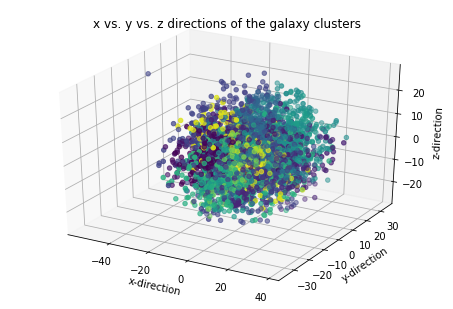

In [5]:
#Assigning labels to the datapoints on which cluster they belong to based on the GMM training
predic = gmm.predict(sample_data6d)


fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(sample_data6d[:, 0], sample_data6d[:, 1],sample_data6d[:,2], c=predic);
ax.set_title('x vs. y vs. z directions of the galaxy clusters')
ax.set_xlabel('x-direction')
ax.set_ylabel('y-direction')
ax.set_zlabel('z-direction')
plt.show()


In [6]:
# 4.2.2) Compare the likelihood function values as evaluation measures for the different
# clustering you receive for different initializations (random vs starting with initial
# clustering achieved by another method).

# different initializations
gmm_kmeans = GM(n_components=56, covariance_type='full', init_params='kmeans').fit(sample_data6d)
gmm_random = GM(n_components=56, covariance_type='full', init_params='random').fit(sample_data6d)

print('Log Likelihood function value for Kmeans initialization: ' + str(gmm_kmeans.score(sample_data6d)))

print('Log Likelihood function value for Random initialization: ' + str(gmm_random.score(sample_data6d)))




Log Likelihood function value for Kmeans initialization: -27.479008393361635
Log Likelihood function value for Random initialization: -27.539685552050383


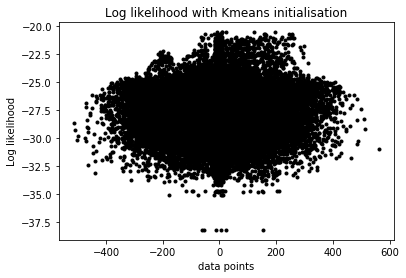

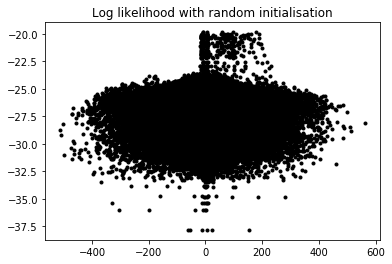

In [7]:
# kmeans initialization
lk = gmm_kmeans.score_samples(sample_data6d)
# Random initialization
lkk = gmm_random.score_samples(sample_data6d)

plt.title('Log likelihood with Kmeans initialisation')
plt.xlabel('data points')
plt.ylabel('Log likelihood')
plt.plot(sample_data6d, lk, '.k')
plt.show()

plt.title('Log likelihood with random initialisation')
plt.plot(sample_data6d, lkk, '.k')
plt.show()


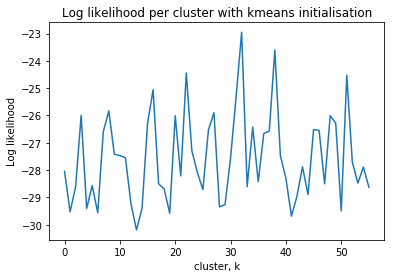

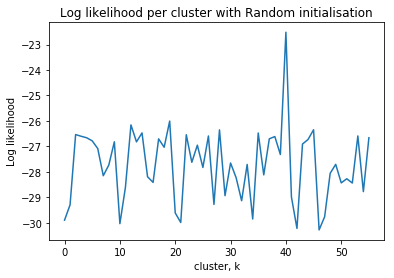

In [14]:
# Kmeans intialisation
gmm_kmeans.predict(sample_data6d)
kmeans_init_cluster = gmm_kmeans.predict(sample_data6d)
np.set_printoptions(suppress=True)
kmc = np.c_[sample_data6d, kmeans_init_cluster]
cl = np.unique(kmeans_init_cluster)

kmp=[]
for f in cl:
    cluster_sample = kmc[kmc[:, 6] == f]
    xx = gmm_kmeans.score(cluster_sample[:, :6])
    kmp.append([f,xx])
    
clusterk, scorek = zip(*kmp)
plt.title('Log likelihood per cluster with kmeans initialisation')
plt.xlabel('cluster, k')
plt.ylabel('Log likelihood')
plt.plot(clusterk, scorek)   
plt.show()   
# random intialization
gmm_random.predict(sample_data6d)
random_init_cluster = gmm_random.predict(sample_data6d)
np.set_printoptions(suppress=True)
rmc = np.c_[sample_data6d, random_init_cluster]
clr = np.unique(random_init_cluster)

rmp = []
for f in clr:
    cluster_sample = rmc[rmc[:, 6] == f]
    xx = gmm_random.score(cluster_sample[:, :6])
    rmp.append([f, xx])
#     plt.plot(cluster_sample,xx,'.k');
#     plt.title('Cluster'+ str(f))
#     plt.show()

clusterr, scorer = zip(*rmp)
plt.title('Log likelihood per cluster with Random initialisation')
plt.xlabel('cluster, k')
plt.ylabel('Log likelihood')
plt.plot(clusterr, scorer) 
plt.show()

In [9]:
# IDS challenge: from the experiments you performed and experience you gained, compare
# the cluster cohesion and separation. Which cluster of stars could arguably be part
# of a galaxy which most recently merged and which stars might be part of a galaxy of
# a very early merge? Provide a file Team x clustering.csv which contains the cluster
# assignment of the points, so we can follow your argumentation.

# comparing cluster cohesion and separation using the silhouette score for each cluster

# csv showing clustering for each observation
cluster_assignment = gmm.predict(sample_data6d)
np.set_printoptions(suppress=True)
stars_clustered = np.c_[sample_data6d, cluster_assignment]
# to_csv
data = pd.DataFrame(stars_clustered, columns=['v1', 'v2', 'v3', 'v4', 'v5', 'v6', 'Cluster'])
data.to_csv('Team 05 clustering.csv')

In [10]:
# comparing cluster cohesion and separation using the silhouette score for each cluster
# The best value is 1 and the worst value is -1. Values near 0 indicate overlapping clusters. 
# Negative values generally indicate that a sample has been assigned to the wrong cluster, as a different cluster 
# is more similar
import sklearn.metrics as mx
mx.silhouette_score(sample_data6d, predic)

# joining the silhoutte scores for each sample
silh = mx.silhouette_samples(sample_data6d, predic)
silh_with_clusters = np.c_[stars_clustered, silh]
# unique clusters
clusters = np.unique(cluster_assignment)
cluster_score = []
for c in clusters:
    cluster_sample = silh_with_clusters[silh_with_clusters[:, 6] == c]
    silhouette = np.sum(cluster_sample[:, 7]) / np.size(cluster_sample[:, 7])
    cluster_score.append([c, silhouette])
    print('Cluster ' + str(c) + ' Score:' + str(silhouette))

Cluster 0 Score:-0.15559498275060882
Cluster 1 Score:-0.06864196302527172
Cluster 2 Score:-0.13544945060223706
Cluster 3 Score:-0.06177954066209025
Cluster 4 Score:-0.29981849474972716
Cluster 5 Score:0.02541476742305014
Cluster 6 Score:0.13510475113962606
Cluster 7 Score:-0.008753117551793957
Cluster 8 Score:-0.12893665319510386
Cluster 9 Score:-0.08991886617729221
Cluster 10 Score:0.04078880017705423
Cluster 11 Score:-0.052037001334496624
Cluster 12 Score:-0.057922325059125736
Cluster 13 Score:-0.09968163260279488
Cluster 14 Score:-0.05682652164018454
Cluster 15 Score:-0.16629805608764242
Cluster 16 Score:-0.3764161808837178
Cluster 17 Score:-0.45563950756152766
Cluster 18 Score:-0.4178446455599625
Cluster 19 Score:-0.10842293928145627
Cluster 20 Score:-0.3610890138375046
Cluster 21 Score:-0.34293669343835376
Cluster 22 Score:-0.1692995889307583
Cluster 23 Score:-0.2098026417801153
Cluster 24 Score:-0.24774747341486403
Cluster 25 Score:-0.27389614405150636
Cluster 26 Score:-0.0762831

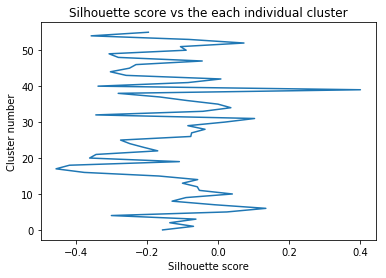

In [12]:
x, y = zip(*cluster_score)
plt.title('Silhouette score vs the each individual cluster')
plt.ylabel('Cluster number')
plt.xlabel('Silhouette score')
plt.plot(y, x)
plt.show()
